# First version

In [1]:
import geopandas as gpd
import osmnx as ox
import networkx as nx
import pandas as pd
import pickle

%matplotlib inline
ox.__version__


'1.3.0'

In [2]:
place = 'Oslo'

cf_bike = {'bike_cyclewaytrack': '["cycleway"~"track|lane|opposite_lane|opposite_track|shared_lane|designated"]',
            'bike_highwaycycleway': '["highway"~"cycleway"]',
            'bike_cyclewayrighttrack': '["cycleway:right"~"track|lane|opposite_lane|opposite_track|shared_lane|designated"]',
            'bike_cyclewaylefttrack': '["cycleway:left"~"track|lane|opposite_lane|opposite_track|shared_lane|designated"]',
            'bike_cyclestreet': '["cyclestreet"]',
            'bike_bicycleroad': '["bicycle_road"]',
            'bike_livingstreet': '["highway"~"living_street"]'
            } 

bike_graphs = []

for graph_type, cf in cf_bike.items():
    try:
        G_bike =  ox.graph_from_place(place, network_type='all', retain_all=True, custom_filter=cf)
        bike_graphs.append(G_bike)
    except ValueError:
        print(f'No data returned for {graph_type}!')
        continue

G_bike = nx.compose_all(bike_graphs)
type(G_bike)

No data returned for bike_bicycleroad!


networkx.classes.multidigraph.MultiDiGraph

In [5]:
file_path = '../data/bike_graph.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(G_bike, f)

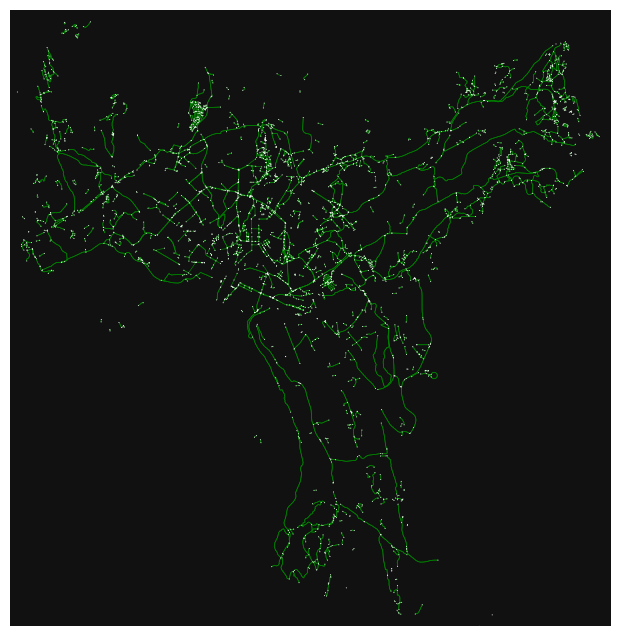

In [4]:
ox.plot_graph(G_bike, node_size=0.5, edge_color="green", edge_linewidth=0.5);

In [5]:
gdf_edges = ox.graph_to_gdfs(G_bike, nodes=False, edges=True)

In [6]:
gdf_edges

osmid  \
u           v           key                                                 
734         1342611555  0                 [625846896, 118391411, 3611175]   
746         1024899     0    [119259633, 882463922, 734602987, 882463921]   
79251       3016808726  0                            [297781376, 4826574]   
79293       270949429   0                                       625840655   
            3241577244  0                                        88716029   
...                                                                   ...   
10579815903 6968217799  0                                       104868148   
10579815929 1209361883  0                                      1134933958   
10703410614 10703410629 0                                      1150616112   
10703410629 10703410614 0                                      1150616112   
10703410633 6535898020  0                                      1150616114   

                              lanes                    name        highway  \
u           v           key                                                  
734         1342611555  0    [4, 5]         Kierschows gate       tertiary   
746         1024899     0    [2, 3]           Blindernveien       tertiary   
79251       3016808726  0       NaN  Kristoffer Aamots gate       tertiary   
79293       270949429   0         2               Parkveien       tertiary   
            3241577244  0         2               Parkveien       tertiary   
...                             ...                     ...            ...   
10579815903 6968217799  0         1  Ragnhild Schibbyes vei  living_street   
10579815929 1209361883  0         1  Ragnhild Schibbyes vei  living_street   
10703410614 10703410629 0       NaN                     NaN  living_street   
10703410629 10703410614 0       NaN                     NaN  living_street   
10703410633 6535898020  0       NaN                     NaN  living_street   

                             oneway reversed   length  \
u           v           key                             
734         1342611555  0     False    False  376.311   
746         1024899     0     False    False   48.442   
79251       3016808726  0     False     True   65.867   
79293       270949429   0     False    False   38.700   
            3241577244  0     False     True  549.271   
...                             ...      ...      ...   
10579815903 6968217799  0     False     True   69.822   
10579815929 1209361883  0     False     True   25.849   
10703410614 10703410629 0     False     True  113.356   
10703410629 10703410614 0     False    False  113.356   
10703410633 6535898020  0     False     True  202.618   

                                                                      geometry  \
u           v           key                                                      
734         1342611555  0    LINESTRING (10.74425 59.93511, 10.74433 59.935...   
746         1024899     0    LINESTRING (10.72903 59.93478, 10.72880 59.934...   
79251       3016808726  0    LINESTRING (10.76529 59.94655, 10.76483 59.946...   
79293       270949429   0    LINESTRING (10.72718 59.91983, 10.72761 59.92010)   
            3241577244  0    LINESTRING (10.72718 59.91983, 10.72626 59.919...   
...                                                                        ...   
10579815903 6968217799  0    LINESTRING (10.93201 59.97534, 10.93207 59.975...   
10579815929 1209361883  0    LINESTRING (10.93094 59.97572, 10.93086 59.975...   
10703410614 10703410629 0    LINESTRING (10.81613 59.84781, 10.81569 59.847...   
10703410629 10703410614 0    LINESTRING (10.81495 59.84735, 10.81501 59.847...   
10703410633 6535898020  0    LINESTRING (10.81657 59.84742, 10.81684 59.847...   

                            maxspeed bridge  ref width tunnel service access  \
u           v           key                                                    
734         1342611555  0        NaN    NaN  NaN   NaN    NaN     NaN    NaN   
74

In [7]:
import folium

m = folium.Map([59.916823,10.747777], zoom_start=13)
folium.Choropleth(
    gdf_edges,
    line_weight=3,
    line_color="blue"
).add_to(m)

m

# Second version (my old)

In [8]:
place = 'Oslo'

cf_bike = {
                'bike_highwaycycleway': '["highway"~"cycleway"]'
            } 

bike_graphs = []

for graph_type, cf in cf_bike.items():
    try:
        G_bike =  ox.graph_from_place(place, network_type='all', retain_all=True, custom_filter=cf)
        bike_graphs.append(G_bike)
    except ValueError:
        print(f'No data returned for {graph_type}!')
        continue

G_bike = nx.compose_all(bike_graphs)

In [ ]:
ox.plot_graph(G_bike, node_size=0.5, edge_color="green", edge_linewidth=0.5);

In [10]:
gdf_edges = ox.graph_to_gdfs(G_bike, nodes=False, edges=True)

In [ ]:
import folium 

m = folium.Map([59.916823,10.747777], zoom_start=13)
folium.Choropleth(
    gdf_edges,
    line_weight=3,
    line_color="blue"
).add_to(m)

m

# Third version

In [12]:
graph = ox.graph_from_place(place, network_type='bike', simplify=False, retain_all=True, truncate_by_edge=False, clean_periphery=True)
edges = ox.graph_to_gdfs(graph, nodes=False)
edges.columns

Index(['osmid', 'name', 'highway', 'oneway', 'reversed', 'length', 'maxspeed',
       'lanes', 'ref', 'bridge', 'width', 'junction', 'service', 'access',
       'tunnel', 'area', 'est_width', 'geometry'],
      dtype='object')

In [13]:
osm_way_tags = ['access', 'barrier', 'bridge', 'bicycle', 'bicycle_road', 'crossing', 'cycleway', 'cycleway:left', 
                'cycleway:right', 'cycleway:both', 'cycleway:buffer', 'cycleway:left:buffer', 'cycleway:right:buffer', 'cycleway:both:buffer', 'cycleway:width', 'cycleway:left:width', 
                'cycleway:right:width', 'cycleway:both:width', 'cycleway:surface', 'foot', 'footway', 'highway', 'inclince', 'junction', 'layer', 'lit', 'maxspeed', 'maxspeed:advisory', 
                'moped', 'moter_vehicle', 'motorcar', 'name', 'oneway', 'oneway:bicycle', 'osm_id', 'segregated', 'surface', 'tracktype', 'tunnel', 'width']

ox.utils.config(use_cache=True, 
    useful_tags_way = osm_way_tags)



/home/janos/Documents/ITU/II_semester/venv/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [14]:
graph = ox.graph_from_place(place, network_type='bike', simplify=False, retain_all=True, truncate_by_edge=False, clean_periphery=True)
nodes, edges = ox.graph_to_gdfs(graph)
edges.columns 



Index(['osmid', 'highway', 'name', 'surface', 'oneway', 'reversed', 'length',
       'lit', 'maxspeed', 'cycleway', 'foot', 'bridge', 'layer', 'bicycle',
       'segregated', 'cycleway:right', 'cycleway:left', 'width',
       'cycleway:both', 'footway', 'oneway:bicycle', 'tracktype', 'junction',
       'motorcar', 'access', 'tunnel', 'maxspeed:advisory', 'cycleway:width',
       'cycleway:surface', 'crossing', 'cycleway:right:width',
       'cycleway:left:width', 'geometry'],
      dtype='object')

In [15]:
def create_cycling_network(new_edges, original_nodes, original_graph, return_nodes=False):
   
    new_edges_index = pd.MultiIndex.to_frame(new_edges.index)
    u = new_edges_index['u'].to_list()
    v = new_edges_index['v'].to_list()

    used_nodes = list(set().union(u,v))

    new_nodes = original_nodes.copy(deep=True)

    new_nodes['osmid'] = new_nodes.index

    new_nodes = new_nodes[new_nodes['osmid'].isin(used_nodes)]

    new_nodes.drop(columns='osmid', inplace=True)

    new_graph = ox.graph_from_gdfs(new_nodes, new_edges, graph_attrs=original_graph.graph)

    if return_nodes:
        return new_graph, new_nodes
    
    else:
        return new_graph

In [16]:
def clean_col_names(df):
    '''
    Remove upper-case letters and : from OSM key names
    '''
    df.columns = df.columns.str.lower()

    df_cols = df.columns.to_list()

    new_cols = [c.replace(':','_') for c in df_cols]

    df.columns = new_cols

    return df


In [17]:
edges = clean_col_names(edges)
nodes = clean_col_names(nodes)

edges['cycling_infrastructure'] = 'no'

queries = ["highway == 'cycleway'",
        "highway == 'living_street'",
        "cycleway in ['lane','track','opposite_lane','opposite_track','shared_lane','designated','crossing','share_busway']",
        "cycleway_left in ['lane','track','opposite_lane','opposite_track','shared_lane','designated','crossing','share_busway']",
        "cycleway_right in ['lane','track','opposite_lane','opposite_track','shared_lane','designated','crossing','share_busway']",
        "cycleway_both in ['lane','track','opposite_lane','opposite_track','shared_lane','designated','crossing','share_busway']",
        "highway == 'track' & bicycle in ['designated','yes']",
        "highway == 'service' & bicycle == 'designated'",
        "bicycle_road == 'yes'",
        "highway == 'path' & bicycle in ['designated','yes']"
        ]

for q in queries:
    try:
        ox_filtered = edges.query(q)

        edges.loc[ox_filtered.index, 'cycling_infrastructure'] = 'yes'
    
    except Exception:
        print('Exception occured when quering with:', q)

cycling_edges = edges.loc[edges.cycling_infrastructure == 'yes']

print(len(edges))
print(len(cycling_edges))

Exception occured when quering with: bicycle_road == 'yes'
860342
70096


In [18]:
cycling_graph = create_cycling_network(cycling_edges, nodes, graph, return_nodes=False)

In [ ]:
ox.plot_graph(cycling_graph)


In [ ]:
ox.plot_graph(graph)

In [21]:
type(cycling_graph)

networkx.classes.multidigraph.MultiDiGraph

In [22]:
type(gdf_edges)

geopandas.geodataframe.GeoDataFrame

In [23]:
bike_edges = ox.graph_to_gdfs(cycling_graph, nodes=False, edges=True)

In [ ]:
m = folium.Map([59.916823,10.747777], zoom_start=13)
folium.Choropleth(
    bike_edges,
    line_weight=3,
    line_color="blue"
).add_to(m)

m

In [25]:
len(gdf_edges)

4152

In [26]:
len(bike_edges)

70096